<a href="https://colab.research.google.com/github/ragaashritha/Project-6/blob/master/Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [4]:
# https://keras.io/
!pip install -q keras
import datetime
import keras
print(datetime.datetime.now())

2019-06-11 16:32:18.265067


In [5]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers importConvolution2D , MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-11 16:32:23.564644


### Load pre-shuffled MNIST data into train and test sets

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 1s 0us/step
2019-06-11 16:32:34.192918


(60000, 28, 28)
2019-06-11 16:32:41.437395


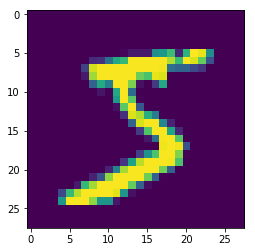

In [7]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-11 16:32:46.775347


In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-11 16:32:51.564327


In [10]:
y_train[:10]
print(datetime.datetime.now())

2019-06-11 16:32:54.530527


In [11]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-11 16:32:57.885611


In [12]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-11 16:33:04.331556


In [0]:
# Shared Input Layer
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D,SeparableConv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate,add

In [30]:
X_train.shape

(60000, 28, 28, 1)

In [31]:
## MAIN BLOCK

from keras.layers import Activation

x1 = Input(shape = (28,28,1))
x2 = Convolution2D(3,3,3,border_mode = 'same',activation = 'relu')(x1)
x3 = add([x1,x2])
x3 = Convolution2D(3, kernel_size = (3,3),border_mode = 'same',activation = 'relu')(x3)

x4 = add([x1, x2, x3]) 
x4 = MaxPooling2D((2,2))(x4)


x5 = Convolution2D(3, kernel_size = (3,3),border_mode = 'same',activation = 'relu')(x4)
x6 = add([x4,x5])
x6 = Convolution2D(3,3,3,border_mode='same',activation='relu')(x6)

x7 = add([x4,x5,x6])
x7 = Convolution2D(3,3,3,border_mode='same',activation='relu')(x7)

x8 = add([x5,x6,x7])
x8 = MaxPooling2D((2,2))(x8)

x9 = Convolution2D(3,3,3,border_mode='same',activation='relu')(x8)
x10 = add([x8,x9])
x10 = Convolution2D(3,3,3,border_mode='same',activation='relu')(x10)

x11 = add([x8,x9,x10])
x11 = Convolution2D(3,3,3,border_mode='same',activation='relu')(x11)

x11 = Convolution2D(10,7,7)(x11)
x12 = Flatten()(x11)
output = Dense(10,activation = 'softmax')(x12)
model = Model(inputs=x1, outputs=output)


print(datetime.datetime.now())

2019-06-11 17:09:14.247322


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), activation="relu", padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, kernel_size=(3, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, kernel_size=(3, 3), activation="relu", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), activation="relu", padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), activation="relu", padding="same")`
/usr/

In [32]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 28, 28, 3)    30          input_11[0][0]                   
__________________________________________________________________________________________________
add_28 (Add)                    (None, 28, 28, 3)    0           input_11[0][0]                   
                                                                 conv2d_39[0][0]                  
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 28, 28, 3)    84          add_28[0][0]                     
__________

In [33]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-11 17:09:22.412792


In [34]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.3372 - acc: 0.8962
Epoch 2/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.1300 - acc: 0.9592
Epoch 3/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.1053 - acc: 0.9667
Epoch 4/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0912 - acc: 0.9720
Epoch 5/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0851 - acc: 0.9738
Epoch 6/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0782 - acc: 0.9759
Epoch 7/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0745 - acc: 0.9764
Epoch 8/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0701 - acc: 0.9782
Epoch 9/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.0655 - acc: 0.9793
Epoch 10/10
60000/60000 [==============================] - 12s 205us/step - loss: 

In [37]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-11 17:11:56.138973


In [38]:
print(score)
print(datetime.datetime.now())

[0.07058418571599759, 0.9794]
2019-06-11 17:11:57.788437
